In [37]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head(8)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7


In [23]:
X = digits.data
X = StandardScaler().fit_transform(X)
y = digits.target

In [26]:
pca = PCA().fit(X)
np_cum = np.cumsum(pca.explained_variance_ratio_)
df_cum = pd.DataFrame({'Component':[i for i in range(1,np_cum.shape[0]+1)],'cum_explained_variance_ratio':np_cum})
filter_df = df_cum[df_cum.cum_explained_variance_ratio>=0.8]
component = int(filter_df.Component.iloc[0])
cum_var = float(filter_df.cum_explained_variance_ratio.iloc[0])
print(f'{component} Components capture {round(cum_var,4)*100}% of variability of the data')

21 Components capture 80.66% of variability of the data


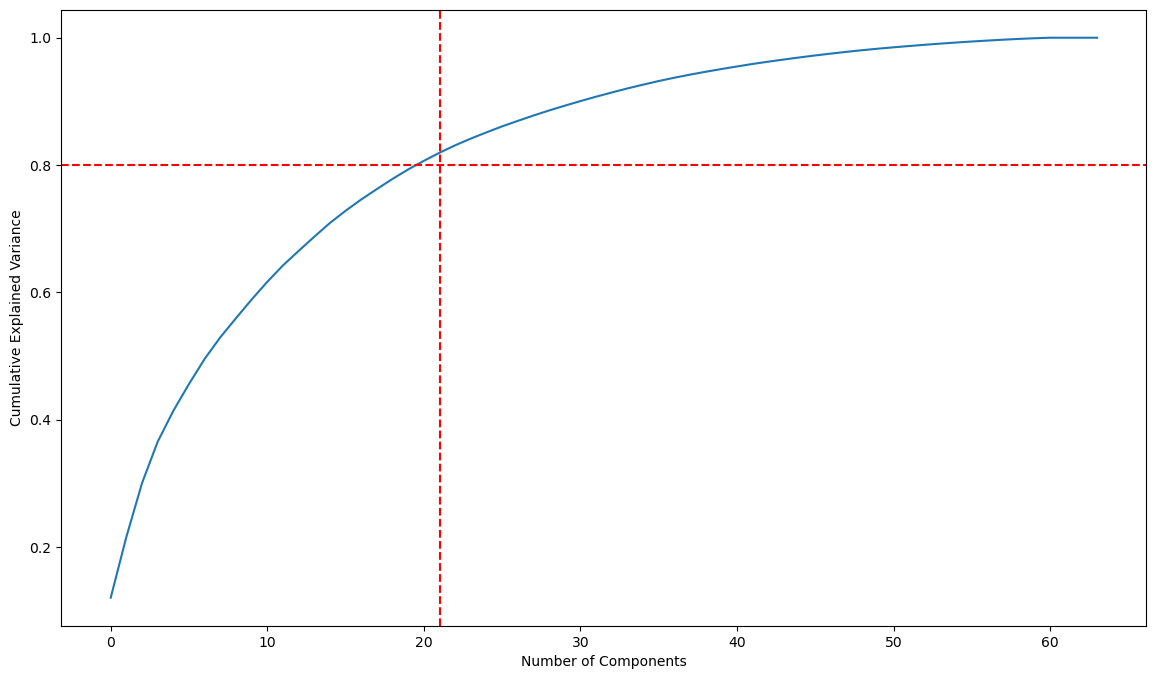

In [33]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(df_cum.cum_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=threshold, color = 'r', linestyle = '--')
plt.axvline(x=component, color = 'r', linestyle = '--')
plt.show()

In [34]:
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)

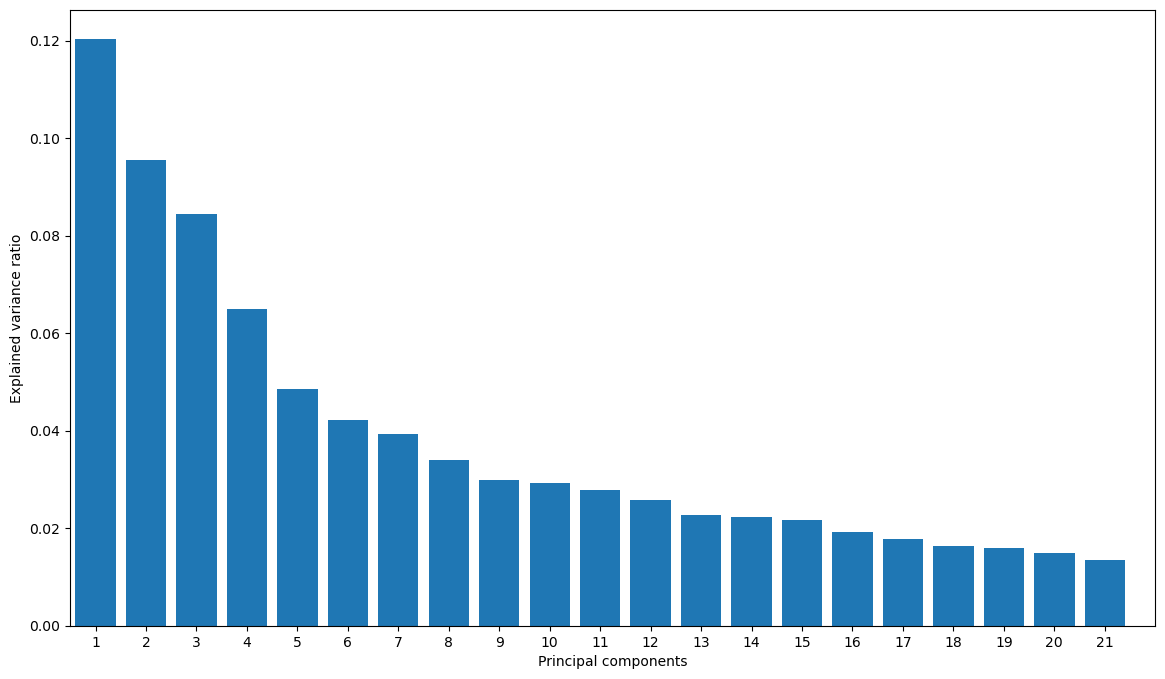

In [35]:
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,22),pca.explained_variance_ratio_,)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xlim([0.5,22])
plt.xticks(range(1,22))
plt.show()

/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_1441/956928128.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


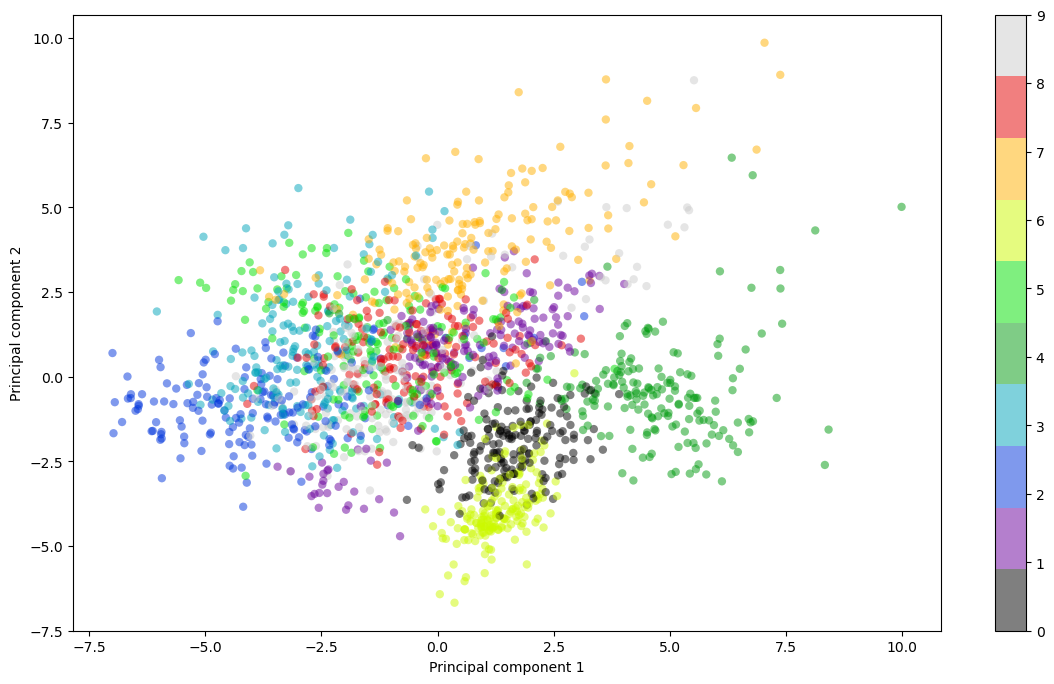

In [36]:
fig = plt.figure(figsize=(14,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()
plt.show()

/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_1441/340855281.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


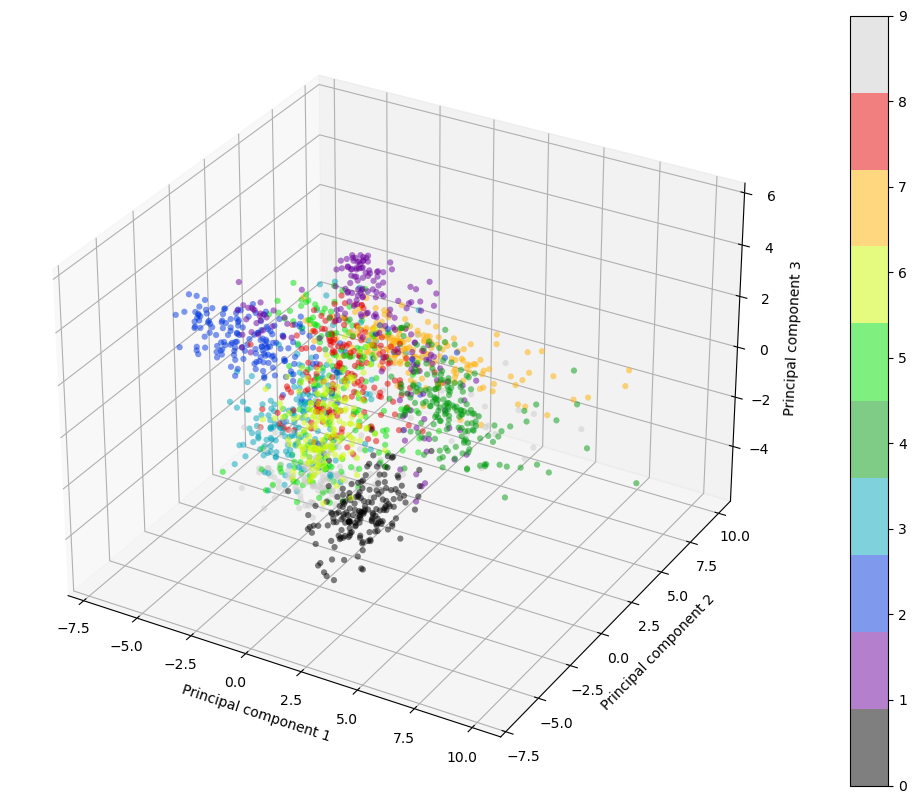

In [38]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes(projection='3d')
p = ax.scatter3D(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
plt.colorbar(p)
plt.show()